In [139]:
import pandas as pd
import numpy as np
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
cancer_reg = pd.read_csv('../data/cancer_reg.csv', encoding = 'ISO-8859-1')
cancer_reg.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [142]:
# size?
cancer_reg.shape

(3047, 34)

In [143]:
cancer_reg['binnedInc'].describe()

count                   3047
unique                    10
top       (54545.6, 61494.5]
freq                     306
Name: binnedInc, dtype: object

In [144]:
# any missing data?
cancer_reg.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [145]:
# Establish our target variable: "RUNS"
cancer_reg['avgAnnCount'].describe()

count     3047.000000
mean       606.338544
std       1416.356223
min          6.000000
25%         76.000000
50%        171.000000
75%        518.000000
max      38150.000000
Name: avgAnnCount, dtype: float64

In [146]:
# To find out our predictors... use "correlations"
corrs = cancer_reg.corr()
corrs
corrs['avgDeathsPerYear'].sort_values()

PctHS25_Over              -0.295929
PctWhite                  -0.187159
PercentMarried            -0.181029
PctMarriedHouseholds      -0.160266
PctHS18_24                -0.151418
MedianAgeMale             -0.148487
MedianAgeFemale           -0.144069
PctNoHS18_24              -0.136794
PctPublicCoverage         -0.131687
TARGET_deathRate          -0.090715
BirthRate                 -0.074420
povertyPercent            -0.066918
PctPublicCoverageAlone    -0.027338
MedianAge                 -0.024599
PctPrivateCoverage         0.056183
incidenceRate              0.062690
studyPerCap                0.063488
PctUnemployed16_Over       0.069701
PctBlack                   0.084607
AvgHouseholdSize           0.086161
PctSomeCol18_24            0.098464
PctPrivateCoverageAlone    0.125820
PctEmployed16_Over         0.125928
PctEmpPrivCoverage         0.160124
PctOtherRace               0.215149
medIncome                  0.223207
PctBachDeg18_24            0.259761
PctBachDeg25_Over          0

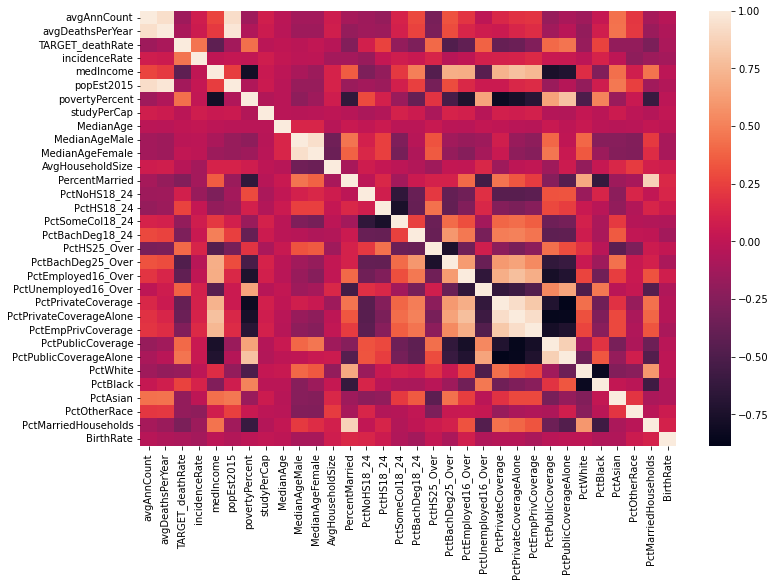

In [147]:
# Display all this as a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corrs);

In [148]:
# any missing data?
cancer_reg.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [149]:
cancer_corr = cancer_reg.corr()
np.abs(cancer_corr['TARGET_deathRate']).sort_values(ascending=False)

TARGET_deathRate           1.000000
PctBachDeg25_Over          0.485477
incidenceRate              0.449432
PctPublicCoverageAlone     0.449358
povertyPercent             0.429389
medIncome                  0.428615
PctEmployed16_Over         0.412046
PctHS25_Over               0.404589
PctPublicCoverage          0.404572
PctPrivateCoverage         0.386066
PctUnemployed16_Over       0.378412
PctPrivateCoverageAlone    0.363704
PctMarriedHouseholds       0.293325
PctBachDeg18_24            0.287817
PctEmpPrivCoverage         0.267399
PercentMarried             0.266820
PctHS18_24                 0.261976
PctBlack                   0.257024
PctOtherRace               0.189894
PctSomeCol18_24            0.188688
PctAsian                   0.186331
PctWhite                   0.177400
avgAnnCount                0.143532
popEst2015                 0.120073
avgDeathsPerYear           0.090715
PctNoHS18_24               0.088463
BirthRate                  0.087407
AvgHouseholdSize           0

<AxesSubplot:title={'center':'TARGET_deathRate'}, xlabel='binnedInc'>

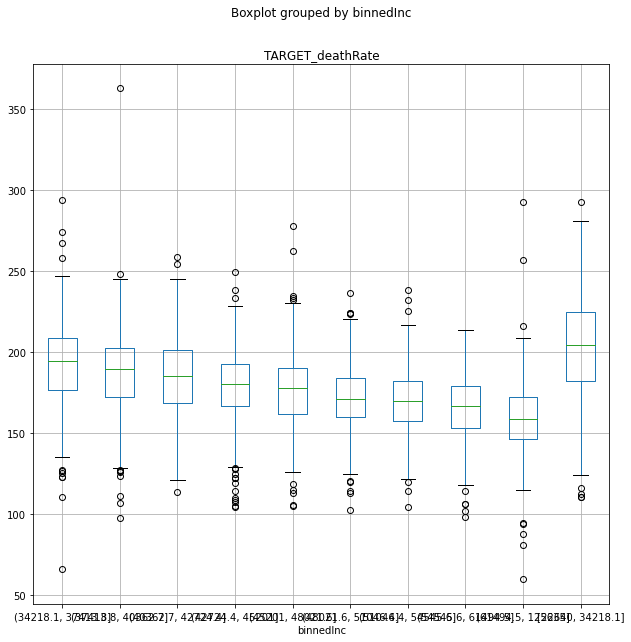

In [150]:
cancer_reg.boxplot(by='binnedInc', column='TARGET_deathRate', figsize=(10,10))

In [151]:
Features = ['PctBachDeg25_Over', 'incidenceRate',
       'PctPublicCoverageAlone', 'povertyPercent', 'medIncome',
       'PctHS25_Over', 'PctPublicCoverage',
       'PctPrivateCoverage', 'PctUnemployed16_Over', 'PctMarriedHouseholds',
       'PctBachDeg18_24', 'PctEmpPrivCoverage', 'PercentMarried', 'PctHS18_24',
       'PctBlack', ]
Target = ['TARGET_deathRate']
X = cancer_reg[Features].values
y = cancer_reg[Target].values

In [152]:
cancer_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [153]:
cancer_reg.drop_duplicates()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [128]:
cancer_reg['PctSomeCol18_24'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       42.1
1       64.0
2        NaN
3       36.1
4       40.0
        ... 
3042     NaN
3043    35.6
3044    33.3
3045     NaN
3046    43.9
Name: PctSomeCol18_24, Length: 3047, dtype: float64>

In [129]:
# This didn't work with the error: ValueError: Input contains NaN, infinity or a value too large for dtype('float64')
# Just drop these columns from the features
cancer_reg['PctSomeCol18_24'].fillna(cancer_reg['PctSomeCol18_24'].mean, inplace=True)
cancer_reg['PctEmployed16_Over'].fillna(cancer_reg['PctEmployed16_Over'].mean, inplace=True)
cancer_reg['PctPrivateCoverageAlone'].fillna(cancer_reg['PctPrivateCoverageAlone'].mean, inplace=True)

In [154]:
# any missing data?
cancer_reg.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

Model Building

In [208]:
Features = ['PctBachDeg25_Over', 'incidenceRate',
       'PctPublicCoverageAlone', 'povertyPercent', 'medIncome',
       'PctHS25_Over', 'PctPublicCoverage',
       'PctPrivateCoverage', 'PctUnemployed16_Over', 'PctMarriedHouseholds',
       'PctBachDeg18_24', 'PctEmpPrivCoverage', 'PercentMarried', 'PctHS18_24',
       'PctBlack', ]
X = cancer_reg[Features]
y = cancer_reg['TARGET_deathRate']

In [209]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2132, 15)
(2132,)
(915, 15)
(915,)


In [210]:
# Fit the model to the training dataset
mymodel = LinearRegression()
mymodel.fit(X_train, y_train)

LinearRegression()

In [211]:
# coefficients and intercept
mymodel.intercept_
mymodel.coef_

array([-1.02722187e+00,  2.06963240e-01, -6.55359682e-02,  6.17678441e-01,
        7.39534206e-05,  6.25500589e-01, -8.23781769e-02, -6.51732775e-01,
        3.43278535e-01, -9.77923044e-01, -1.66749332e-01,  4.66819420e-01,
        5.18190433e-01,  2.77005122e-01, -2.08862923e-02])

In [212]:
# what is the equation for this model?
cols=list(X.columns)
coefs=list(mymodel.coef_)
xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]
equation = f'y = {round(mymodel.intercept_,4)} + {round(xcoefs[0][0],4)}*{xcoefs[0][1]} + {round(xcoefs[1][0],4)}*{xcoefs[1][1]} + {round(xcoefs[2][0],4)}*{xcoefs[2][1]} + {round(xcoefs[3][0],4)}*{xcoefs[3][1]}+ {round(xcoefs[4][0],4)}*{xcoefs[4][1]}+ {round(xcoefs[5][0],4)}*{xcoefs[5][1]} + {round(xcoefs[6][0],4)}*{xcoefs[6][1]} + {round(xcoefs[7][0],4)}*{xcoefs[7][1]} + {round(xcoefs[8][0],4)}*{xcoefs[8][1]} + {round(xcoefs[9][0],4)}*{xcoefs[9][1]} + {round(xcoefs[10][0],4)}*{xcoefs[10][1]} + {round(xcoefs[11][0],4)}*{xcoefs[11][1]} + {round(xcoefs[12][0],4)}*{xcoefs[12][1]} + {round(xcoefs[13][0],4)}*{xcoefs[13][1]} + {round(xcoefs[14][0],4)}*{xcoefs[14][1]}'
print("Regression Equation: ", equation)

Regression Equation:  y = 102.7807 + -1.0272*PctBachDeg25_Over + 0.207*incidenceRate + -0.0655*PctPublicCoverageAlone + 0.6177*povertyPercent+ 0.0001*medIncome+ 0.6255*PctHS25_Over + -0.0824*PctPublicCoverage + -0.6517*PctPrivateCoverage + 0.3433*PctUnemployed16_Over + -0.9779*PctMarriedHouseholds + -0.1667*PctBachDeg18_24 + 0.4668*PctEmpPrivCoverage + 0.5182*PercentMarried + 0.277*PctHS18_24 + -0.0209*PctBlack


In [214]:
# Predict the y-values on the testing dataset & examine the first few
y_preds = [int(x) for x in mymodel.predict(X_test)]
print(list(y_test[:5]))
print(y_preds[:5])

[186.5, 152.5, 174.2, 207.6, 192.0]
[186, 162, 165, 192, 183]


Model Evaluation

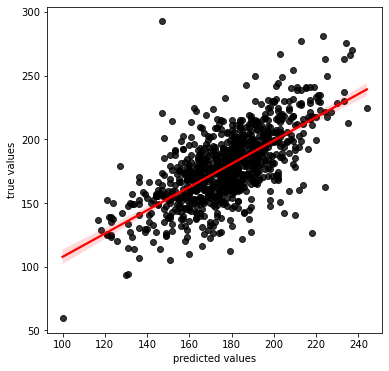

In [215]:
# compare predictions to known values
plt.figure(figsize=(6,6))
ax = sns.regplot(x = y_preds, 
                 y = y_test, 
                 scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
ax.set(xlabel='predicted values', ylabel='true values');

In [216]:
# R-2 (coefficient of determination)
r2 = metrics.r2_score(y_test, y_preds)
round(r2, 2)

0.45

In [217]:
# root mean sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

21.176318095632954

In [218]:
# is that more or less than if we just used the average as our model?
avg_val = y_train.mean()
comparison = np.full((len(y_test), ), avg_val)
baseline=sqrt(metrics.mean_squared_error(y_test, comparison))
print(round(baseline,2))
print(round(rmse,2))
print('improvement:',round(rmse-baseline,2))

28.53
21.18
improvement: -7.35


Make new predictions

In [219]:
# remember the linear regression equation?
print(equation)

y = 102.7807 + -1.0272*PctBachDeg25_Over + 0.207*incidenceRate + -0.0655*PctPublicCoverageAlone + 0.6177*povertyPercent+ 0.0001*medIncome+ 0.6255*PctHS25_Over + -0.0824*PctPublicCoverage + -0.6517*PctPrivateCoverage + 0.3433*PctUnemployed16_Over + -0.9779*PctMarriedHouseholds + -0.1667*PctBachDeg18_24 + 0.4668*PctEmpPrivCoverage + 0.5182*PercentMarried + 0.277*PctHS18_24 + -0.0209*PctBlack


In [220]:
cancer_reg['PctBachDeg25_Over'].describe()

count    3047.000000
mean       13.282015
std         5.394756
min         2.500000
25%         9.400000
50%        12.300000
75%        16.100000
max        42.200000
Name: PctBachDeg25_Over, dtype: float64